In [9]:
import pandas as pd
review_data = pd.read_csv('book_review_lemma.csv', index_col=0)


In [10]:
review_data.head()

,rating,reviewText,word_count,word_lemma,word_lemma_count
0,1,This book was the very first bookmobile book I...,482,book first bookmobile book buy school book clu...,26
1,0,"When I read the description for this book, I c...",3223,read description book couldnt wait read downlo...,181
2,1,I just had to edit this review. This book is a...,3772,edit review book believe get right update rewr...,238
3,1,I don't normally buy 'mystery' novels because ...,564,dont normally buy mystery novels dont like how...,34
4,1,"This isn't the kind of book I normally read, a...",603,isnt kind book normally read although try limi...,40


In [11]:
review_data=review_data.drop(columns=['reviewText','word_count','word_lemma_count'])

In [12]:
review_data.head()

,rating,word_lemma
0,1,book first bookmobile book buy school book clu...
1,0,read description book couldnt wait read downlo...
2,1,edit review book believe get right update rewr...
3,1,dont normally buy mystery novels dont like how...
4,1,isnt kind book normally read although try limi...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word' , min_df=5, encoding='latin-1', stop_words='english')
features = tfidf.fit_transform(review_data.word_lemma).toarray()
features.shape

(12000, 7543)

In [54]:

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DscTree', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy' # balanced data 

LR: 0.819417 (0.010814)
KNN: 0.725250 (0.010382)
DscTree: 0.676000 (0.010184)
NB: 0.813250 (0.006795)


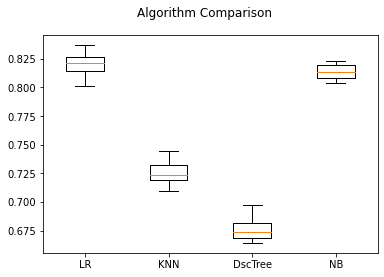

In [16]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, features, review_data.rating, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

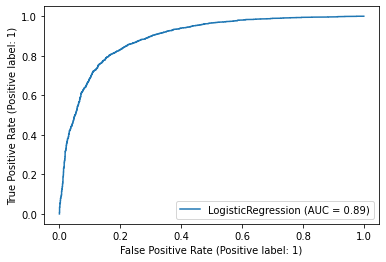

In [25]:
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm


X_train, X_test, Y_train, Y_test, indices_train, indices_test = train_test_split(features, review_data.rating,review_data.index,test_size=0.33, random_state=0)
nb = MultinomialNB()
nb.fit(X_train, Y_train)
lr = LogisticRegression() 
lr.fit(X_train, Y_train)
metrics.plot_roc_curve(lr,X_test,Y_test)

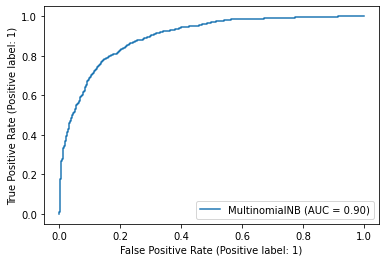

In [26]:
metrics.plot_roc_curve(nb,X_test,Y_test)

LR: 0.821384 (0.012706)
KNN: 0.744277 (0.013608)
DscTree: 0.672786 (0.014669)
NB: 0.811876 (0.008856)


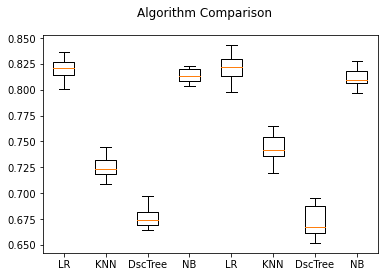

In [22]:

scoring = 'f1' # balanced data 
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, features, review_data.rating, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

********<class 'sklearn.linear_model._logistic.LogisticRegression'>**********
Confusion matrix

 [[1609  365]
 [ 359 1627]]

True Positives(TP) =  1609

True Negatives(TN) =  1627

False Positives(FP) =  365

False Negatives(FN) =  359
********end**********
********<class 'sklearn.neighbors._classification.KNeighborsClassifier'>**********
Confusion matrix

 [[1328  646]
 [ 422 1564]]

True Positives(TP) =  1328

True Negatives(TN) =  1564

False Positives(FP) =  646

False Negatives(FN) =  422
********end**********
********<class 'sklearn.tree._classes.DecisionTreeClassifier'>**********
Confusion matrix

 [[1314  660]
 [ 671 1315]]

True Positives(TP) =  1314

True Negatives(TN) =  1315

False Positives(FP) =  660

False Negatives(FN) =  671
********end**********
********<class 'sklearn.naive_bayes.MultinomialNB'>**********
Confusion matrix

 [[1644  330]
 [ 398 1588]]

True Positives(TP) =  1644

True Negatives(TN) =  1588

False Positives(FP) =  330

False Negatives(FN) =  398
******

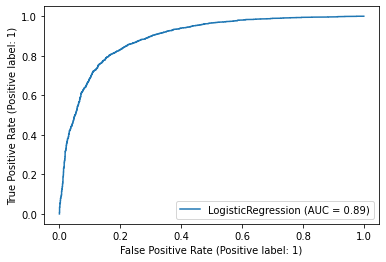

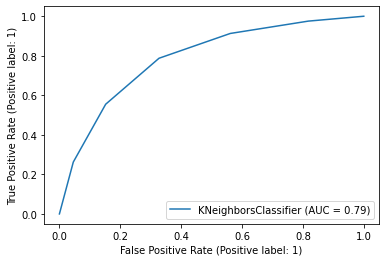

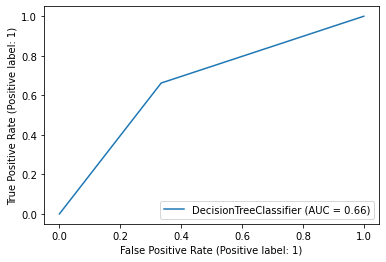

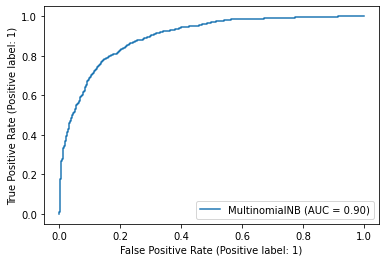

In [55]:
X_train, X_test, Y_train, Y_test, indices_train, indices_test = train_test_split(features, review_data.rating,review_data.index,test_size=0.33, random_state=0)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


for name, model in models:
    clf=model.fit(X_train, Y_train)
    y_pred = (clf.predict((X_test)))
    cm=[]
    print("********"+str(type(model))+"**********")
    cm = confusion_matrix(Y_test, y_pred)
    print('Confusion matrix\n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])

    # visualize confusion matrix with seaborn heatmap
   # print("********"+str(type(model))+"**********")
   # cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])
   # sns.heatmap(cm_matrix, annot=True)
   # print(classification_report(Y_test, y_pred))
    print("********end**********")
    metrics.plot_roc_curve(model,X_test,Y_test)



<AxesSubplot:>

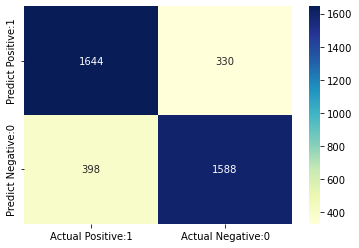

In [59]:
model =MultinomialNB()
clf = model.fit(X_train, Y_train)
y_pred = (clf.predict((X_test)))
df_res = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot:>

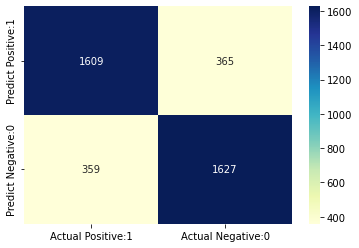

In [60]:
model =LogisticRegression()
clf = model.fit(X_train, Y_train)
y_pred = (clf.predict((X_test)))
df_res = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')